In [50]:
from pathlib import Path

import jax
import matplotlib.pyplot as plt
import numpy as np
from dynamical_systems.metrics import (
    cosine_similarity as cosine_similarity,
    maximum_mean_discrepancy as maximum_mean_discrepancy,
    mean_squared_error as mean_squared_error,
    sinkhorn_divergence as sinkhorn_divergence,
)


plt.style.use("matplotlib_utils.styles.dash_gridded")
jax.config.update("jax_enable_x64", True)

SYSTEMS = ("lorenz63", "rossler76", "hyperchen05")
DATASET_PATHS = {
    "lorenz63": {"train": "lorenz63_large.hdf5", "test": "lorenz63_large_test.hdf5"},
    "rossler76": {"train": "rossler76_train.hdf5", "test": "rossler76_test.hdf5"},
    "hyperchen05": {"train": "hyperchen05_train.hdf5", "test": "hyperchen05_test.hdf5"},
}
EXP_TYPES_ALL = (
    "vanilla",
    "jacobian",
    "tangent_evolution",
    "neighborhood",
    "normal",
    "proxy_tangent_evolution",
)
EXP_TYPES = (
    "vanilla",
    "jacobian",
    "tangent_evolution",
    # "proxy_tangent_evolution",
    "neighborhood",
)
COLOR_DICT = dict(
    zip(
        EXP_TYPES_ALL,
        ("royalblue", "limegreen", "darkorange", "orangered", "saddlebrown", "purple"),
    )
)
LABEL_DICT = dict(
    zip(
        EXP_TYPES_ALL,
        (
            "MSE only",
            "Jacobian matching",
            "Tangent Evolution matching",
            "Neighborhood",
            "Normal-based (ours)",
            "Identity (ours)",
        ),
    )
)

datadir = Path("../../data")

In [14]:
system_dict = {}
for system in ("lorenz63", "rossler76", "hyperchen05"):
    sinkhorn_dict = dict()
    for exp_type in ("vanilla", "neighborhood"):
        sinkhorn_dict[exp_type] = np.stack(
            [
                np.load(
                    f"../../results_analysis/{system}/sinkhorn/{exp_type}/downsample=2_len=2_key={key}.npy"
                )
                for key in (0, 10, 20, 30, 40)
            ],
            axis=0,
        )

    system_dict[system] = sinkhorn_dict
system_dict

{'lorenz63': {'vanilla': array([[2.44508603e-07, 3.16563303e-05, 5.34532660e-04, 9.58801003e-04],
         [8.56397429e-07, 8.39255013e-06, 6.72771045e-04, 6.83744305e-04],
         [3.28172026e-07, 2.78968351e-06, 2.12415847e-04, 3.44382373e-04],
         [5.73080832e-07, 1.77332513e-05, 2.10166526e-04, 2.39343254e-04],
         [4.87834264e-07, 5.31497347e-06, 8.72954071e-04, 4.83936655e-04]]),
  'neighborhood': array([[1.91408703e-07, 4.43387031e-06, 3.23638324e-04, 3.24483000e-04],
         [2.37282515e-07, 4.30124691e-05, 3.70333439e-04, 8.72645717e-04],
         [4.75557229e-07, 8.66117200e-05, 9.97004429e-04, 2.26363941e-04],
         [5.51242732e-07, 8.32684219e-06, 6.32977097e-04, 3.13534092e-04],
         [5.78892302e-07, 2.13167403e-05, 5.55506509e-04, 1.19931942e-03]])},
 'rossler76': {'vanilla': array([[-3.32588840e-06,  1.85147492e-05,  5.01509704e-04,
           4.95707667e-04],
         [-1.51143431e-06,  6.65551474e-05,  9.76734957e-04,
           9.80983606e-04],
    

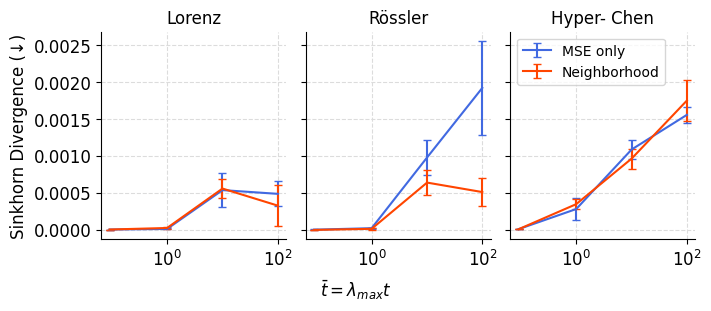

In [51]:
from scipy.stats import iqr


fig, axes = plt.subplots(1, 3, figsize=(7, 3), sharey=True)

for exp_type in ("vanilla", "neighborhood"):
    axes[0].errorbar(
        np.array([9, 99, 999, 9999]) * 0.01,
        np.median(system_dict["lorenz63"][exp_type], axis=0),
        yerr=0.5 * iqr(system_dict["lorenz63"][exp_type], axis=0),
        color=COLOR_DICT[exp_type],
        capsize=3,
    )


for exp_type in ("vanilla", "neighborhood"):
    axes[1].errorbar(
        np.array([9, 99, 999, 9999]) * 0.01,
        np.median(system_dict["rossler76"][exp_type], axis=0),
        yerr=0.5 * iqr(system_dict["rossler76"][exp_type], axis=0),
        color=COLOR_DICT[exp_type],
        capsize=3,
    )
for exp_type in ("vanilla", "neighborhood"):
    axes[2].errorbar(
        np.array([9, 99, 999, 9999]) * 0.01,
        np.median(system_dict["hyperchen05"][exp_type], axis=0),
        yerr=0.5 * iqr(system_dict["hyperchen05"][exp_type], axis=0),
        color=COLOR_DICT[exp_type],
        label=LABEL_DICT[exp_type],
        capsize=3,
    )
axes[0].set_ylabel("Sinkhorn Divergence (↓)")
fig.supxlabel(r"$\bar{t}=\lambda_{max}t$", fontsize="medium")
for i, name in enumerate(("Lorenz", "Rössler", "Hyper- Chen")):
    axes[i].set_title(name, fontsize="medium")
axes[2].legend(fontsize="small")
for ax in axes:
    ax.set_xscale("log")

In [52]:
fig.savefig("../../figures/sinkhorn.pdf", dpi=1200)